<a href="https://colab.research.google.com/github/aahan-rd/ECON3916-Statistical-Machine-Learnin/blob/main/Econ_3916_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
!pip install fredapi
from fredapi import Fred
import pandas as pd
import matplotlib.pyplot as plt
student_basket = [
    {'Item':'Tuition', 'Price_2016': 45000, 'Price_2024': 58000},
    {'Item':'Rent (1 Bed)', 'Price_2016': 1200, 'Price_2024': 1800},
    {'Item':'Chipotle Burrito', 'Price_2016': 7.50, 'Price_2024': 11.50},
    {'Item':'RedBull Energy', 'Price_2016': 2.25, 'Price_2024': 3.50}
]

In [40]:
def calculate_inflation(base, current):
  return ((current-base)/base)*100

for item in student_basket:
  rate = calculate_inflation(item['Price_2016'], item['Price_2024'])
  print(f"{item['Item']}: {rate:.2f}% Inflation")

Tuition: 28.89% Inflation
Rent (1 Bed): 50.00% Inflation
Chipotle Burrito: 53.33% Inflation
RedBull Energy: 55.56% Inflation


In [98]:
fred = Fred(api_key='4cb783c2de3eeb396b405be6b2040998')
official_cpi=fred.get_series('CPIAUCSL')
tuition = fred.get_series('CUSR0000SEEB')
rent = fred.get_series('CUSR0000SEHA')
food = fred.get_series('CUSR0000SEFV')
beverage = fred.get_series('CUUR0000SAF114')
beverage.head()

,0
1947-01-01,11.4
1947-02-01,11.7
1947-03-01,12.0
1947-04-01,12.1
1947-05-01,12.1


In [44]:
def normalize_data(df):
  base_year = "2016-01-01"
  base_values = df.loc[base_year]
  df_normalized = (df / base_values) * 100
  return df_normalized
official_cpi_normal = normalize_data(official_cpi)
tuition_normal = normalize_data(tuition)
rent_normal = normalize_data(rent)
food_normal = normalize_data(food)
beverage_normal = normalize_data(beverage)
beverage_normal.loc["2016"].head()

,0
2016-01-01,100.000000
2016-02-01,100.314134
2016-03-01,99.685274
2016-04-01,100.031413
2016-05-01,99.013146


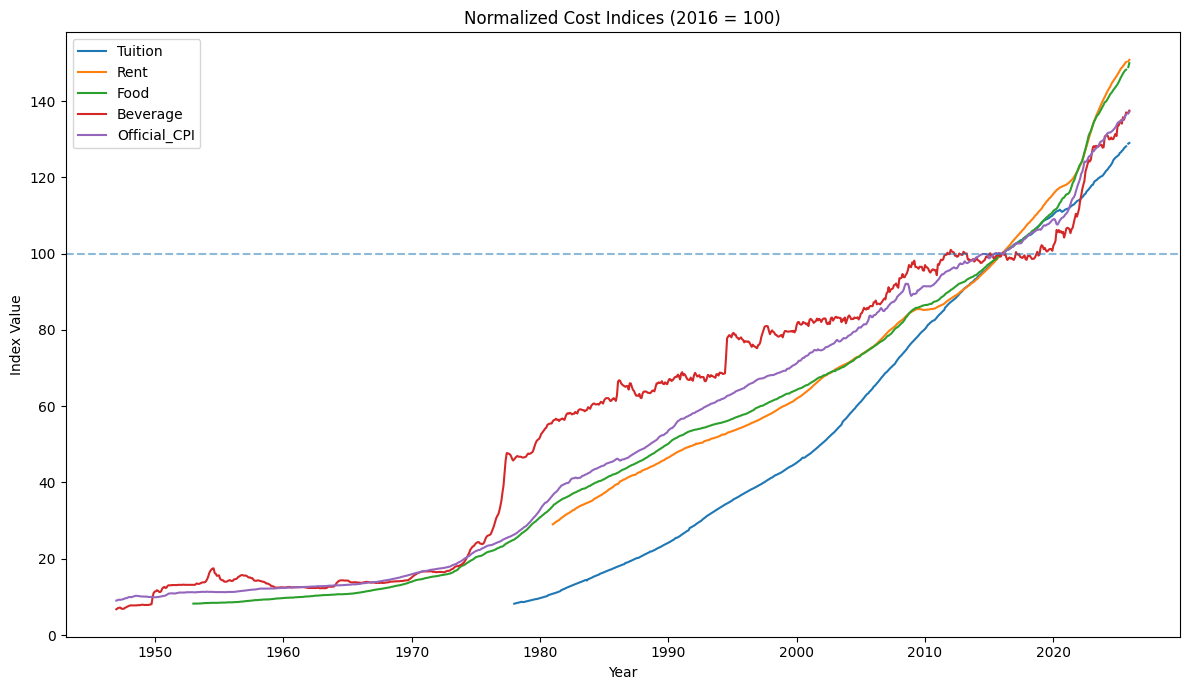

In [95]:
df_all = pd.concat(
    [
        tuition_normal.rename("Tuition"),
        rent_normal.rename("Rent"),
        food_normal.rename("Food"),
        beverage_normal.rename("Beverage"),
        official_cpi_normal.rename("Official_CPI")
    ],
    axis=1
)
plt.figure(figsize=(12, 7))
for column in df_all.columns:
    plt.plot(df_all.index, df_all[column], label=column)

plt.axhline(100, linestyle="--", alpha=0.5)
plt.legend()
plt.title("Normalized Cost Indices (2016 = 100)")
plt.ylabel("Index Value")
plt.xlabel("Year")
plt.tight_layout()
plt.show()

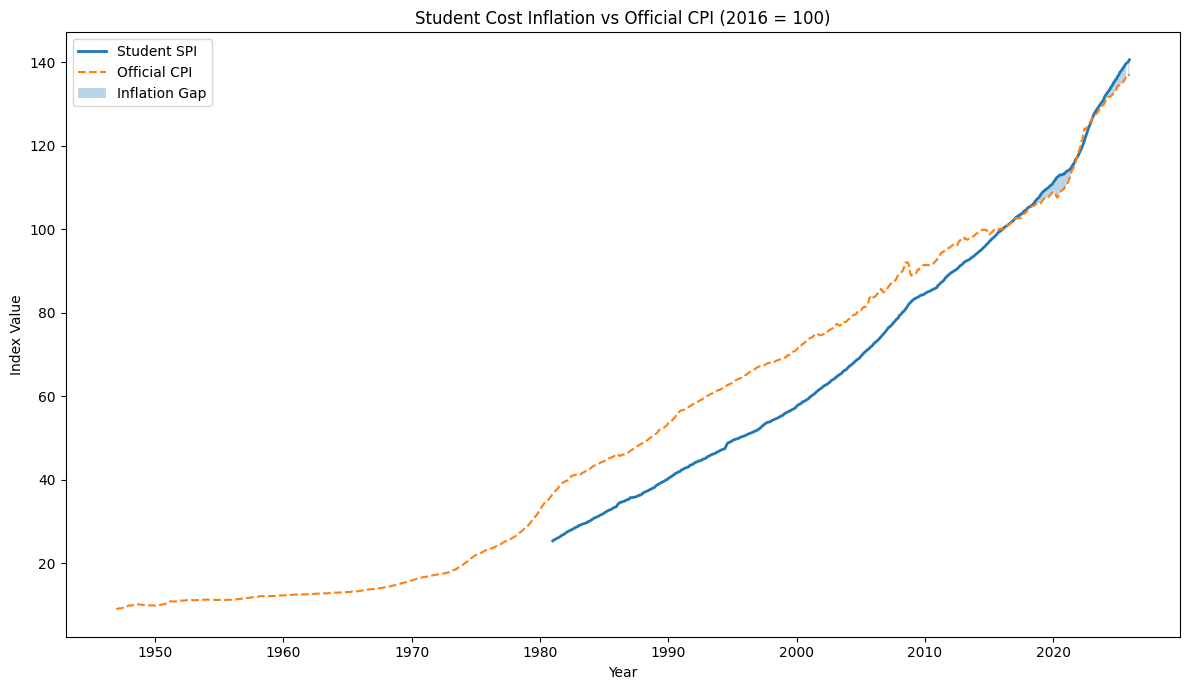

In [96]:
df_all["Student_SPI"] = (
    df_all["Tuition"] * .40
    + df_all["Rent"] * .30
    + df_all["Food"] * .20
    + df_all["Beverage"] * .1
)
plt.figure(figsize=(12, 7))

plt.plot(df_all.index, df_all["Student_SPI"], label="Student SPI", linewidth=2)
plt.plot(df_all.index, df_all["Official_CPI"], label="Official CPI", linestyle="--")

plt.fill_between(
    df_all.index,
    df_all["Student_SPI"],
    df_all["Official_CPI"],
    where=(df_all["Student_SPI"] > df_all["Official_CPI"]),
    alpha=0.3,
    label="Inflation Gap"
)

plt.legend()
plt.title("Student Cost Inflation vs Official CPI (2016 = 100)")
plt.ylabel("Index Value")
plt.xlabel("Year")
plt.tight_layout()
plt.show()

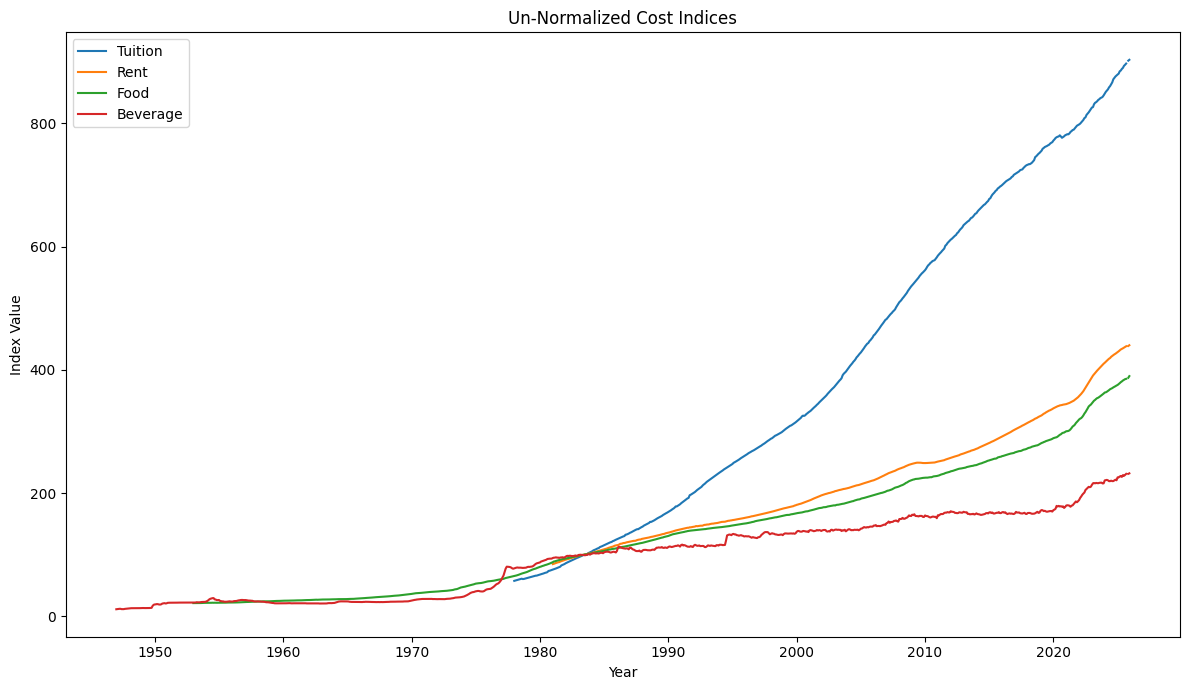

In [112]:
df_all_un = pd.concat(
    [
        tuition.rename("Tuition"),
        rent.rename("Rent"),
        food.rename("Food"),
        beverage.rename("Beverage")
    ],
    axis=1
)
plt.figure(figsize=(12, 7))
for column in df_all_un.columns:
    plt.plot(df_all_un.index, df_all_un[column], label=column)

plt.legend()
plt.title("Un-Normalized Cost Indices")
plt.ylabel("Index Value")
plt.xlabel("Year")
plt.tight_layout()
plt.show()

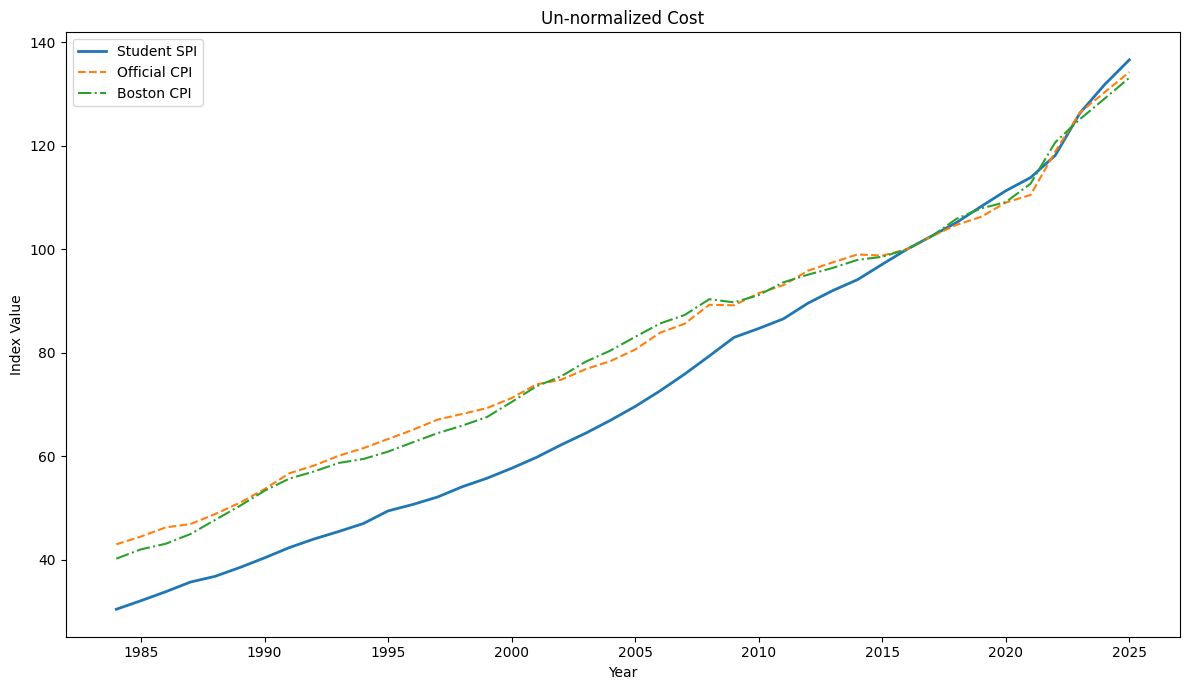

In [110]:
boston_cpi = fred.get_series("CUUSA103SA0")
boston_cpi.index = pd.to_datetime(boston_cpi.index)
boston_cpi_normal = normalize_data(boston_cpi)
boston_cpi_normal.name = "Boston_CPI"
df_all = df_all.drop(columns=["Boston_CPI"], errors="ignore")
df_all = df_all.join(boston_cpi_normal, how="inner")


plt.figure(figsize=(12, 7))
plt.plot(df_all.index, df_all["Student_SPI"], label="Student SPI", linewidth=2)
plt.plot(df_all.index, df_all["Official_CPI"], label="Official CPI", linestyle="--")
plt.plot(df_all.index, df_all["Boston_CPI"], label="Boston CPI", linestyle="dashdot")

plt.legend()
plt.title("Un-normalized Cost")
plt.ylabel("Index Value")
plt.xlabel("Year")
plt.tight_layout()
plt.show()